In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('/Users/mayurimamdi/Downloads/archive-7/winequality-white.csv')

In [39]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [40]:
X=df.drop('quality', axis=1)
y=df['quality']

In [41]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_scaled_mm = mm_scaler.fit_transform(X)
X_scaled_mm

array([[0.30769231, 0.18627451, 0.21686747, ..., 0.25454545, 0.26744186,
        0.12903226],
       [0.24038462, 0.21568627, 0.20481928, ..., 0.52727273, 0.31395349,
        0.24193548],
       [0.41346154, 0.19607843, 0.24096386, ..., 0.49090909, 0.25581395,
        0.33870968],
       ...,
       [0.25961538, 0.15686275, 0.11445783, ..., 0.24545455, 0.27906977,
        0.22580645],
       [0.16346154, 0.20588235, 0.18072289, ..., 0.56363636, 0.18604651,
        0.77419355],
       [0.21153846, 0.12745098, 0.22891566, ..., 0.49090909, 0.11627907,
        0.61290323]], shape=(4898, 11))

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_mm, y, test_size=0.2, random_state=42)


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))	
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.25      0.20      0.22         5
           4       0.17      0.28      0.21        25
           5       0.57      0.62      0.59       291
           6       0.59      0.61      0.60       432
           7       0.59      0.46      0.51       192
           8       0.38      0.29      0.33        35

    accuracy                           0.56       980
   macro avg       0.43      0.41      0.41       980
weighted avg       0.57      0.56      0.56       980

[[  1   2   0   2   0   0]
 [  0   7   6  11   1   0]
 [  1  17 179  83  11   0]
 [  1  14 108 264  42   3]
 [  1   2  15  73  88  13]
 [  0   0   5  12   8  10]]
0.560204081632653


In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, gbr_pred))


MAE: 0.5360901552789429


In [45]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
pred = ridge.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 0.5917201984942136


In [46]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
svr = SVR(kernel='rbf', C=10, epsilon=0.1)
svr.fit(X_train, y_train)
pred = svr.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 0.5290107312495363


In [47]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
mlp = MLPRegressor(hidden_layer_sizes=(64, 32),max_iter=1000,random_state=42)
mlp.fit(X_train, y_train)
pred = mlp.predict(X_test)
print("MAE:", mean_absolute_error(y_test, pred))


MAE: 0.5542671153430069


TRied diffrent models to imporve the accuracy 

Now lets check the feature importnace of this dataset 

In [48]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("MAE:", mean_absolute_error(y_test, rf_pred))


MAE: 0.4898835354984984


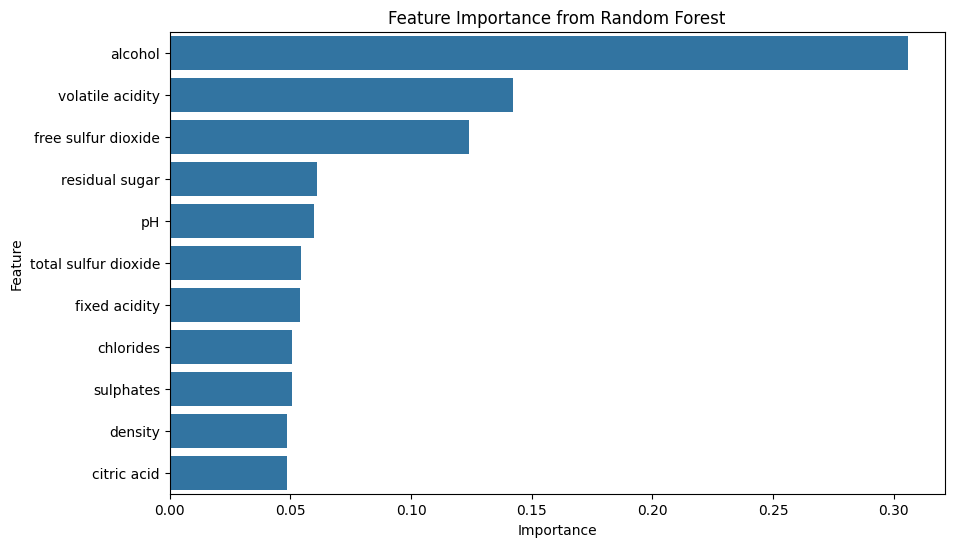

In [49]:
co=rf.feature_importances_
features=X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': co})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [50]:
ff=feature_importance_df.nlargest(7, 'Importance')
ff

,Feature,Importance
10,alcohol,0.305810
1,volatile acidity,0.142197
5,free sulfur dioxide,0.123975
3,residual sugar,0.060988
8,pH,0.059625
6,total sulfur dioxide,0.054502
0,fixed acidity,0.054027


In [51]:
X=df[ff['Feature']]
y=df['quality']

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_mm, y, test_size=0.2, random_state=42)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))	
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.25      0.20      0.22         5
           4       0.17      0.28      0.21        25
           5       0.57      0.62      0.59       291
           6       0.59      0.61      0.60       432
           7       0.59      0.46      0.51       192
           8       0.38      0.29      0.33        35

    accuracy                           0.56       980
   macro avg       0.43      0.41      0.41       980
weighted avg       0.57      0.56      0.56       980

[[  1   2   0   2   0   0]
 [  0   7   6  11   1   0]
 [  1  17 179  83  11   0]
 [  1  14 108 264  42   3]
 [  1   2  15  73  88  13]
 [  0   0   5  12   8  10]]
0.560204081632653


Still the same accuracy now what to do?

Lets check correlation matrix 

<Axes: >

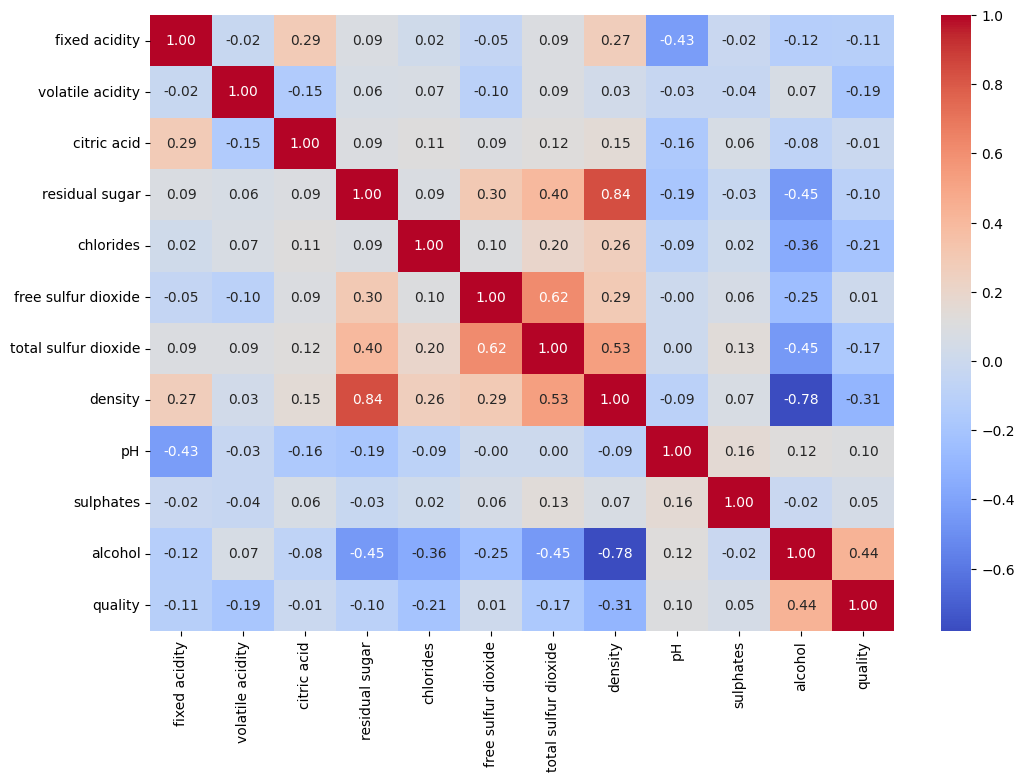

In [54]:
co=df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(co, annot=True, cmap='coolwarm', fmt='.2f')

In [55]:
X=df.drop(columns=['quality','density'], axis=1)
y=df['quality']


<Axes: >

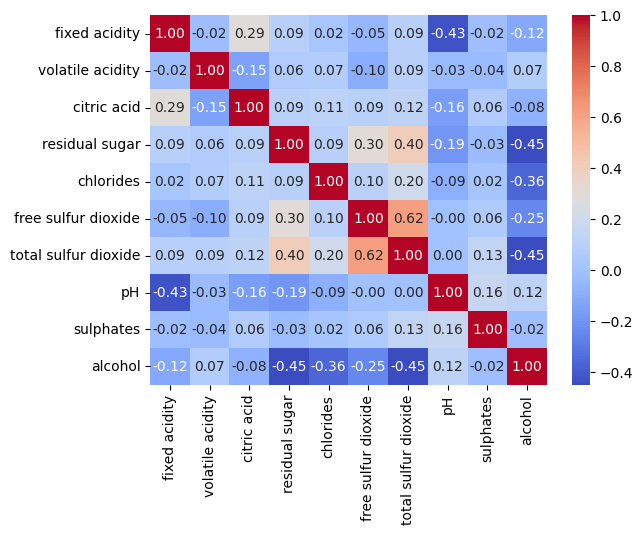

In [56]:
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled_mm, y, test_size=0.2, random_state=42)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred2= knn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))	
print(accuracy_score(y_test, y_pred2))

              precision    recall  f1-score   support

           3       0.25      0.20      0.22         5
           4       0.17      0.28      0.21        25
           5       0.57      0.62      0.59       291
           6       0.59      0.61      0.60       432
           7       0.59      0.46      0.51       192
           8       0.38      0.29      0.33        35

    accuracy                           0.56       980
   macro avg       0.43      0.41      0.41       980
weighted avg       0.57      0.56      0.56       980

[[  1   2   0   2   0   0]
 [  0   7   6  11   1   0]
 [  1  17 179  83  11   0]
 [  1  14 108 264  42   3]
 [  1   2  15  73  88  13]
 [  0   0   5  12   8  10]]
0.560204081632653


Still the same 

Do upvote, thanks